In [1]:
import numpy as np
from utils.pandasUtils import get_main_dt, save_stat_dt, get_stat_dt
from utils.metricsUtils import get_stat

In [2]:
dt = get_main_dt()
dt_stat = get_stat_dt()

dt.head()

,surface,text_type,text
image,,,
paper-4,paper,printed,50.87\nТРЕБОВАНИЯ БЕЗОПАСНОСТИ\nЦЕМЕНТ СООТВЕТ...
paper-1,paper,printed,EWL\nПЕСКОБЕТОН\nM-300\n40 RU\nCOXAR CHEC)
paper-2,paper,printed,ecomaterial\nbasic\nEMENT®\nЦЕМЕНТ\nССПЦ 500-Д...
paper-3,paper,printed,НЕ БРОСАТЬ!\nПроизводитель / Manufacturor\nОЛО...
paper-5,paper,printed,Г КВАРЦЕВЫЙ ПЕСОК\nИРАНОРНАЯ КРОШКА\nПЛЕНКА\nС...


In [3]:
dt.groupby(['surface']).size()

surface
brick      28
glass      14
gold        7
metal      20
paper      12
plastic    14
silver     16
tyre       17
wood       22
dtype: int64

In [4]:
dt.groupby(['text_type']).size()

text_type
pressed        51
printed        55
squeezedout    44
dtype: int64

                                                      image  levenstein  \
easyocr                                                                   
50 кг 8т 'безопасности safety requirements треб...  paper-4   -0.497053   
nwi пескобеток [-з0б иихая сиви аокг                paper-1    0.693342   
ны ement ппромемеит 1p сспц 500-д20 ~ # |_= рас...  paper-2    0.538875   
птомагад шапukulurn адотвск рассмg; баикортоста...  paper-3    0.124083   
660 muk халевол ocп 3 e1 2500x1250x12 ty 5534-6...  wood-16    0.166189   

                                                        jaro   damerau  \
easyocr                                                                  
50 кг 8т 'безопасности safety requirements треб... -0.191955  0.044477   
nwi пескобеток [-з0б иихая сиви аокг               -0.493219 -0.511042   
ны ement ппромемеит 1p сспц 500-д20 ~ # |_= рас...  0.370940 -3.110167   
птомагад шапukulurn адотвск рассмg; баикортоста... -0.713226  0.734664   
660 muk халевол ocп 3 e1 2500x

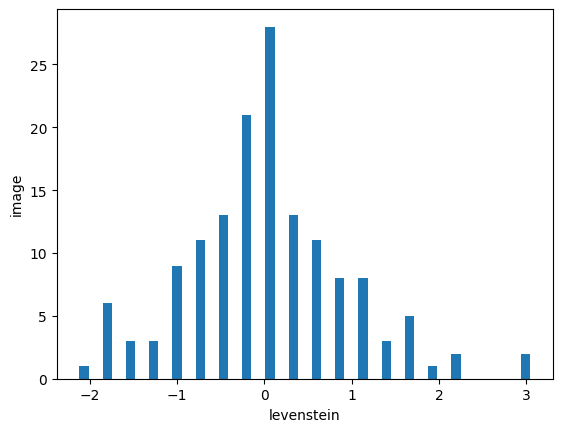

None


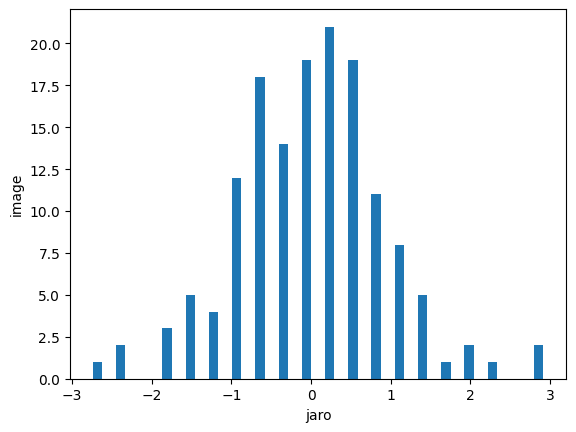

None


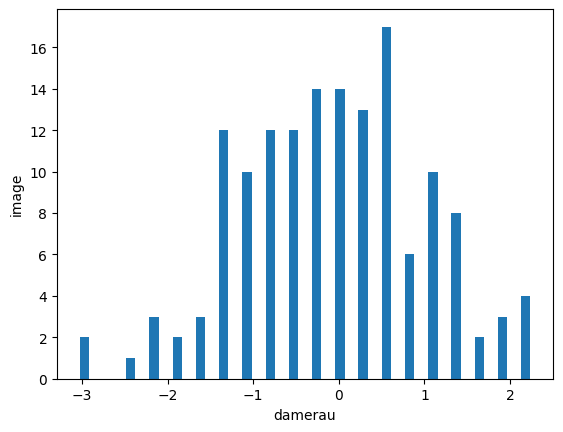

None


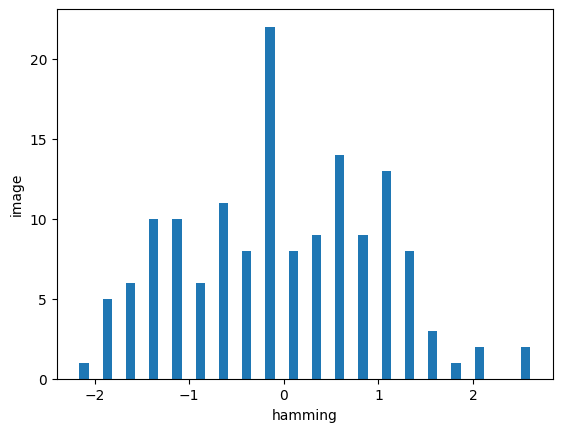

None


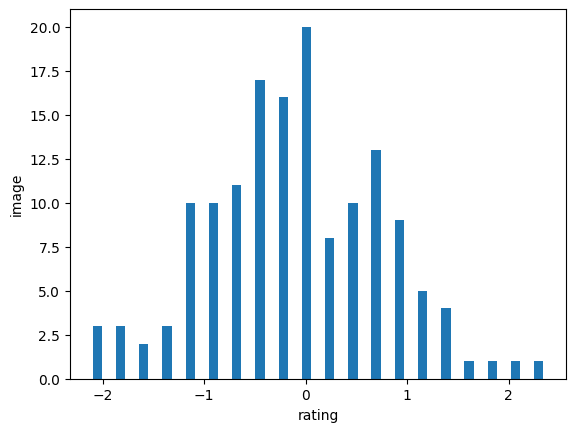

None


In [5]:
from utils.utils import easyocr_column_name

get_stat(dt, dt_stat, easyocr_column_name)

                                                      image  levenstein  \
pytesseract                                                               
neckobetok\nlm\n\n                                  paper-1    0.927058   
nw ement\n\necomaterial\ncct, 500-1120 basi¢\ny...  paper-2   -1.182653   
2, tokiheakay\nshkortostan, 4891\nteleak #73479...  paper-3    0.652078   
tulatendho pasmewwats chkvyi                        paper-4   -1.063512   
NaN                                                 paper-5    1.231116   

                                                        jaro   damerau  \
pytesseract                                                              
neckobetok\nlm\n\n                                 -1.044647 -1.460923   
nw ement\n\necomaterial\ncct, 500-1120 basi¢\ny...  0.943921  1.396992   
2, tokiheakay\nshkortostan, 4891\nteleak #73479...  0.241655 -2.271371   
tulatendho pasmewwats chkvyi                        0.859056 -0.049545   
NaN                           

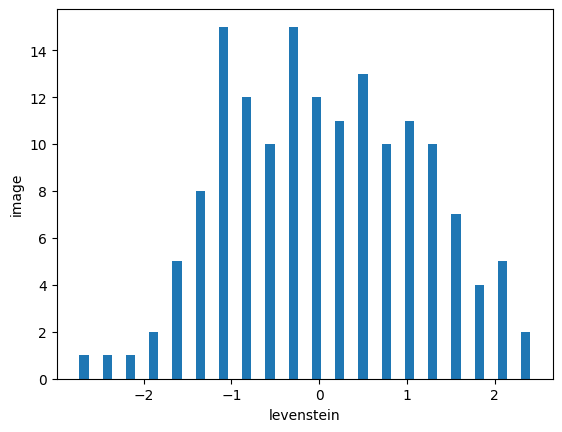

None


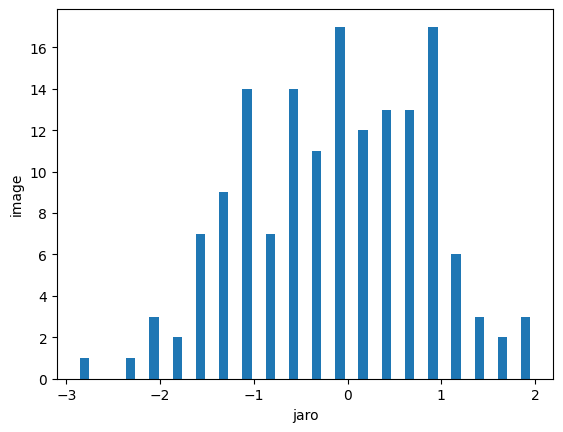

None


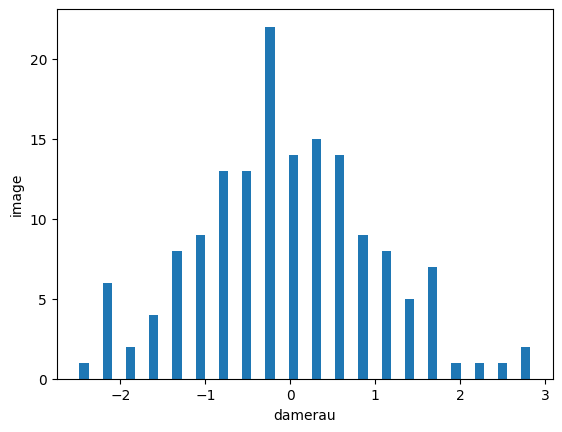

None


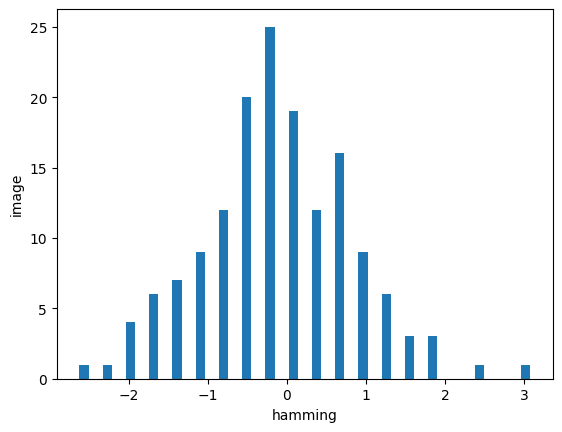

None


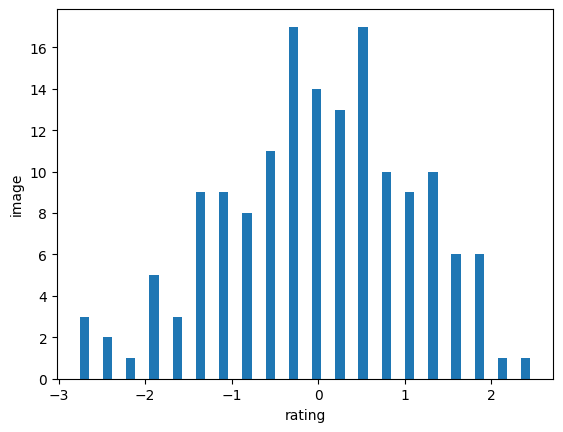

None


In [6]:
from utils.utils import pytesseract_column_name

get_stat(dt, dt_stat, pytesseract_column_name)

                                                      image  levenstein  \
doctr                                                                     
50.81 safety requirements gost 31108-2016 and a...  paper-4   -0.046007   
nwl neckobetok m-300 cyxan chece ienentho-rscm ...  paper-1   -0.185154   
jement ebpomeewt ecomaterial basic tpyn ccn4500...  paper-2    0.848001   
he spocatb! pomamopwren, - manufacturer oaohsck...  paper-3    2.433463   
xotio,hbaa acoaibi "onmmkc" bcenoroahbi ot-20 a...  paper-5   -1.804155   

                                                        jaro   damerau  \
doctr                                                                    
50.81 safety requirements gost 31108-2016 and a...  2.396431  1.018938   
nwl neckobetok m-300 cyxan chece ienentho-rscm ...  0.279384 -0.322333   
jement ebpomeewt ecomaterial basic tpyn ccn4500... -0.011488 -0.344369   
he spocatb! pomamopwren, - manufacturer oaohsck...  0.914355  1.761897   
xotio,hbaa acoaibi "onmmkc" bc

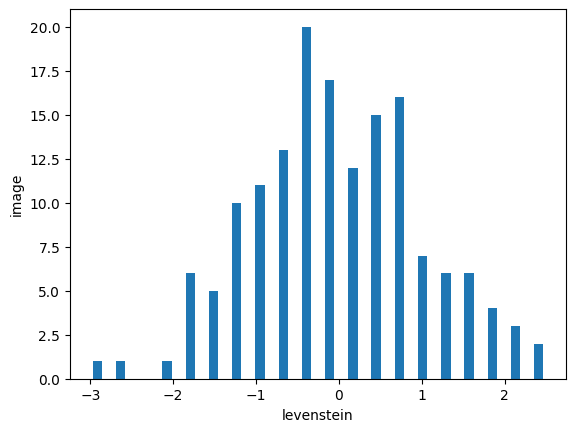

None


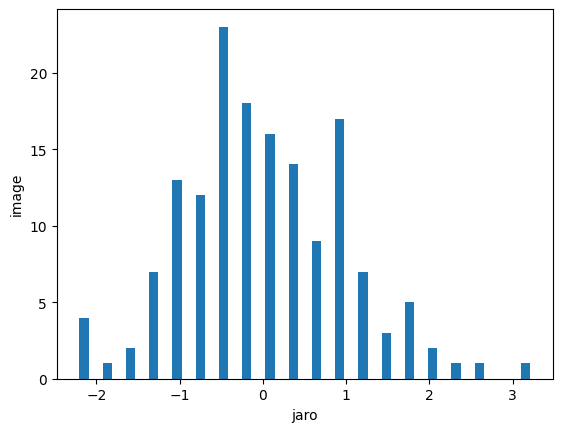

None


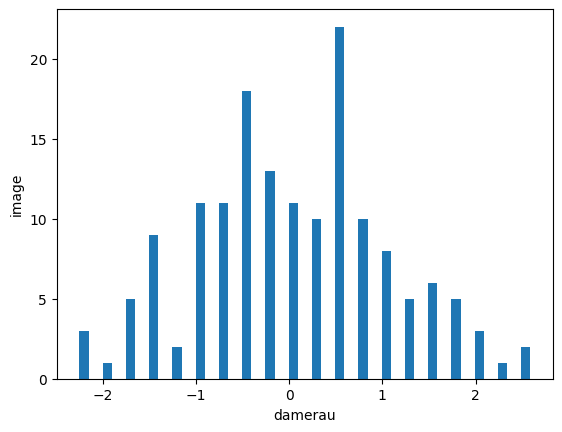

None


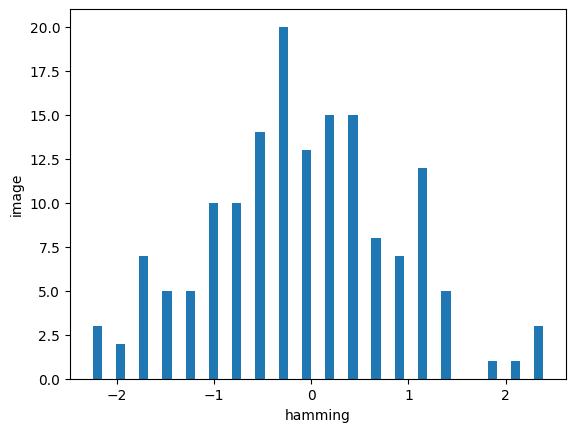

None


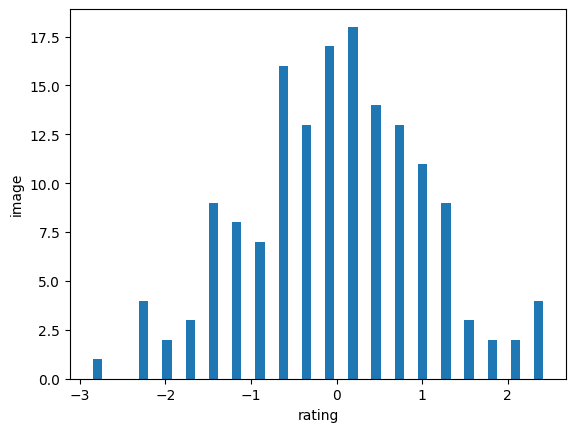

None


In [7]:
from utils.utils import doctr_column_name

get_stat(dt, dt_stat, doctr_column_name)

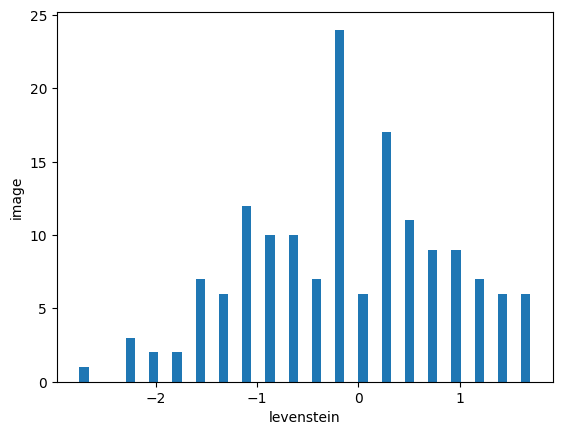

None


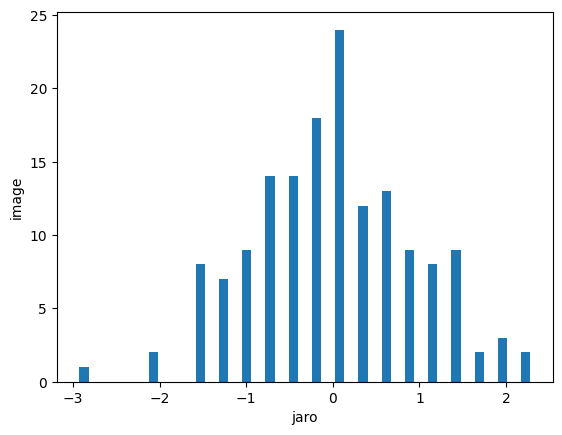

None


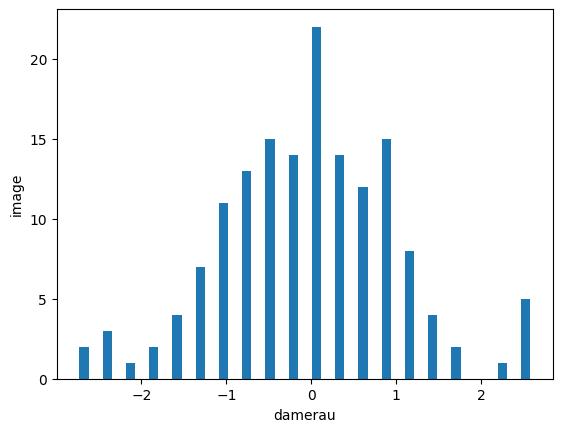

None


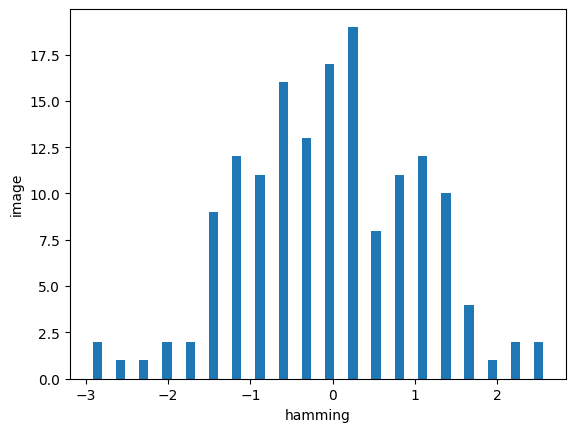

None


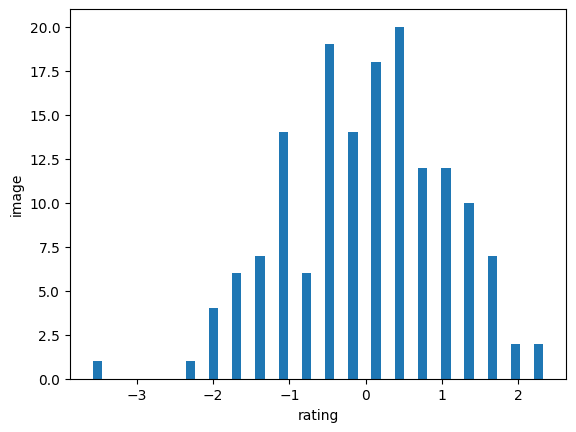

None


In [3]:
from utils.utils import paddleocr_column_name

get_stat(dt, dt_stat, paddleocr_column_name)

In [21]:
from utils.pandasUtils import model_column_name
import pandas as pd

stat_model = np.unique(dt_stat.index.get_level_values(0))
dt_stat_places = pd.DataFrame(columns=list(range(1,stat_model.size + 1)))
dt_stat_places.index = pd.MultiIndex.from_frame(pd.DataFrame(columns=[model_column_name]))

for model in stat_model:
    dt_stat_places.loc[model] = 0

In [17]:
from utils.pandasUtils import type_column_name, metric_column_name

save_stat_dt(dt_stat)

stat_metrics = np.unique(dt_stat.index.get_level_values(1))
stat_types = np.unique(dt_stat.index.get_level_values(2))
for stat_type in stat_types:
    for stat_metric in stat_metrics:
        tmp = dt_stat.xs(stat_metric, level=metric_column_name)\
            .xs(stat_type, level=type_column_name)\
            .sort_values('mean',ascending=False)
        print(metric_column_name + ':' + stat_metric + ',' + type_column_name + ':' + stat_type)
        print(tmp)
        print('____________________________________________________')
        print()
        for idx, model in enumerate(tmp.index):
            dt_stat_places.loc[model, idx + 1] += 1

    print('====================================================')
    print()

metric:damerau,type:brick
                 mean    median       min       max
model                                              
paddleocr    0.315863  0.192434 -1.314463  2.275459
pytesseract  0.115339  0.311889 -1.822370  2.306504
doctr       -0.088844 -0.170422 -2.184119  2.606280
easyocr     -0.505474 -0.532561 -2.232488  1.021039
____________________________________________________

metric:hamming,type:brick
                 mean    median       min       max
model                                              
easyocr      0.092476 -0.009246 -1.684211  1.411256
pytesseract -0.061251 -0.056299 -1.870684  1.691363
paddleocr   -0.205300 -0.325686 -2.298300  1.515683
doctr       -0.454688 -0.378190 -2.213556  1.061623
____________________________________________________

metric:jaro,type:brick
                 mean    median       min       max
model                                              
doctr        0.134541  0.188936 -1.207992  1.289007
paddleocr   -0.198880 -0.107219 -3.00

In [20]:
dt_stat_places.sort_values(1,ascending=False)

,1,2,3,4
[model],,,,
doctr,22,14,16,13
paddleocr,16,18,14,17
easyocr,15,18,13,19
pytesseract,12,15,22,16
